In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataframe
visits_df = pd.read_csv('../raw_data/Morocco_CCT_Education_School_Visits.csv', low_memory=False)

In [3]:
# printing few top rows
visits_df.head()

,stud_id,schoolunitid,schoolid,type_unit,groupid,benef,region,province,hhid_tayssir,stud_id_tayssir,...,gendercode,agecode,surveycode,year0,year1,year2,year3,year4,year5,year6
0,A00131005,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T012435,T01243501,...,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010
1,A00131007,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T016963,T01696302,...,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010
2,A00132009,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T000939,T00093903,...,2.0,7.0,183_SV,2008,2009,2009,2009,2009,2010,2010
3,A00131008,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,NaN,NaN,...,1.0,7.0,183_SV,2008,2009,2009,2009,2009,2010,2010
4,A00131001,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T032351,T03235102,...,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010


In [4]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71355 entries, 0 to 71354
Columns: 181 entries, stud_id to year6
dtypes: float64(116), int64(25), object(40)
memory usage: 98.5+ MB


In [5]:
visits_df.describe()

,groupid,gender,age_2010,prob_age,niv_annee2,v0_id_batch,v0_n_fiche,v0_i9,v0_i10,v0_i12_niveau,...,ruralcode,gendercode,agecode,year0,year1,year2,year3,year4,year5,year6
count,71355.000000,71355.000000,69511.000000,71355.000000,71354.000000,0.0,0.0,42119.000000,43275.000000,43686.000000,...,71355.0,71349.000000,69511.000000,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0
mean,1.873057,1.454208,10.692581,0.027622,3.558763,NaN,NaN,63.980650,1565.030942,2.764272,...,1.0,1.454330,10.692581,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
std,1.360360,0.498071,3.405805,0.163890,1.907942,NaN,NaN,43.478153,847.665718,1.384461,...,0.0,0.497913,3.405805,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,2.000000,0.000000,1.000000,NaN,NaN,0.000000,106.000000,0.000000,...,1.0,1.000000,2.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
25%,1.000000,1.000000,9.000000,0.000000,2.000000,NaN,NaN,23.000000,905.000000,2.000000,...,1.0,1.000000,9.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
50%,2.000000,1.000000,11.000000,0.000000,3.000000,NaN,NaN,56.000000,1505.000000,3.000000,...,1.0,1.000000,11.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
75%,3.000000,2.000000,13.000000,0.000000,5.000000,NaN,NaN,107.000000,2305.000000,4.000000,...,1.0,2.000000,13.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
max,4.000000,2.000000,101.000000,1.000000,8.000000,NaN,NaN,136.000000,3105.000000,5.000000,...,1.0,2.000000,101.000000,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0


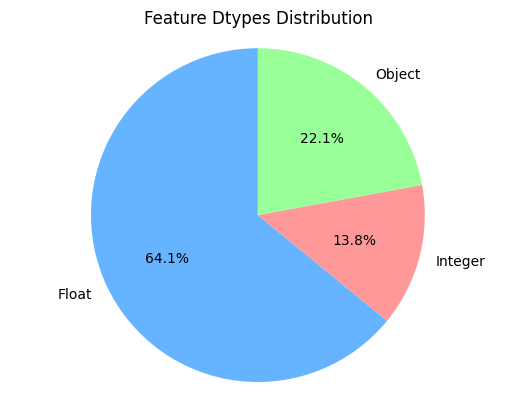

In [6]:
# getting an idea of dtypes and how many they are in the data

float_features = visits_df.select_dtypes(include=np.float64).shape[1]
int_features = visits_df.select_dtypes(include=np.int64).shape[1]
object_features = visits_df.select_dtypes(include=object).shape[1]


labels = ['Float', 'Integer', 'Object']
sizes = [float_features, int_features, object_features]
colors = ['#66b3ff', '#ff9999', '#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Feature Dtypes Distribution')
plt.show()

# Testing and sellecting necessary features

* v0_i12_niveau - Grade

* v0_i15 - Does the school unit have electricity ?

* v1_c13 - if dropped out date

* v0_a9 - Attendence

In [35]:
subset = visits_df[['stud_id', 'schoolunitid', 'v0_i12_niveau', 'v0_i15', 'v0_a9', 'gender', 'region', 'province']]
subset

,stud_id,schoolunitid,v0_i12_niveau,v0_i15,v0_a9,gender,region,province
0,A00131005,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,1,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...
71350,A63915011,A639,5.0,4.0,3.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,2.0,4.0,2.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,5.0,4.0,2.0,1,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,1.0,4.0,1.0,2,Marrakech - Tensift - Al Haouz,Essaouira


In [36]:
subset = subset.rename(columns={
    'v0_i12_niveau': 'Grade',
    'schoolunitid': 'Schoolunitid',
    'v0_i15': 'Does the school unit have electricity ?',
    'v1_c13': 'if dropped out date',  
    'v0_a9': 'Attendance',
    'gender': 'Gender',
    'region': 'Region',
    'province': 'Province' 
})

In [37]:
subset

,stud_id,Schoolunitid,Grade,Does the school unit have electricity ?,Attendance,Gender,Region,Province
0,A00131005,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,1,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...
71350,A63915011,A639,5.0,4.0,3.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,2.0,4.0,2.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,5.0,4.0,2.0,1,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,1.0,4.0,1.0,2,Marrakech - Tensift - Al Haouz,Essaouira


In [38]:
subset.isna().sum()

stud_id                                        0
Schoolunitid                                   0
Grade                                      27669
Does the school unit have electricity ?    27718
Attendance                                 27688
Gender                                         0
Region                                         0
Province                                       0
dtype: int64

In [39]:
# checking the number of unique values in dataset in Student_id
subset['stud_id'].nunique()

71355

In [40]:
# checking all values in each column
subset['Gender'].value_counts(dropna=False)

1    38933
2    32416
0        6
Name: Gender, dtype: int64

In [42]:
subset.drop(subset[subset['Gender'] == 0].index, inplace=True)

In [43]:
subset['Gender'].value_counts(dropna=False)

1    38933
2    32416
Name: Gender, dtype: int64

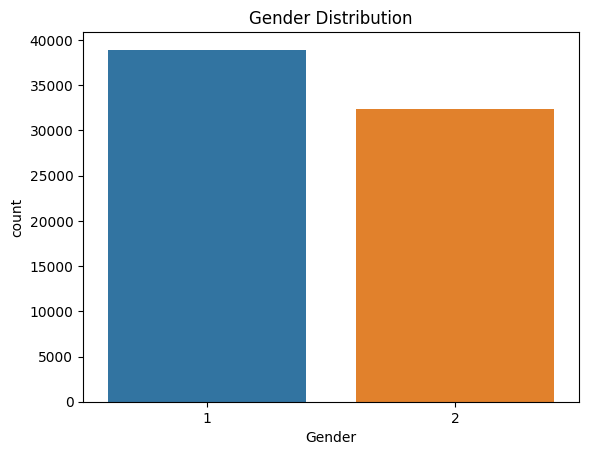

In [44]:
sns.countplot(x = subset['Gender'], data = subset)
plt.title('Gender Distribution')
plt.show()

In [45]:
subset['Grade'].value_counts(dropna=False)

NaN    27666
1.0    10557
2.0     9911
3.0     9086
4.0     7509
5.0     6616
0.0        4
Name: Grade, dtype: int64

In [46]:
subset

,stud_id,Schoolunitid,Grade,Does the school unit have electricity ?,Attendance,Gender,Region,Province
0,A00131005,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
1,A00131007,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
2,A00132009,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
3,A00131008,A001,NaN,NaN,NaN,1,Meknhs - Tafilalet,Khenifra
4,A00131001,A001,NaN,NaN,NaN,2,Meknhs - Tafilalet,Khenifra
...,...,...,...,...,...,...,...,...
71350,A63915011,A639,5.0,4.0,3.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71351,A63912002,A639,2.0,4.0,2.0,2,Marrakech - Tensift - Al Haouz,Essaouira
71352,A63915014,A639,5.0,4.0,2.0,1,Marrakech - Tensift - Al Haouz,Essaouira
71353,A63911007,A639,1.0,4.0,1.0,2,Marrakech - Tensift - Al Haouz,Essaouira


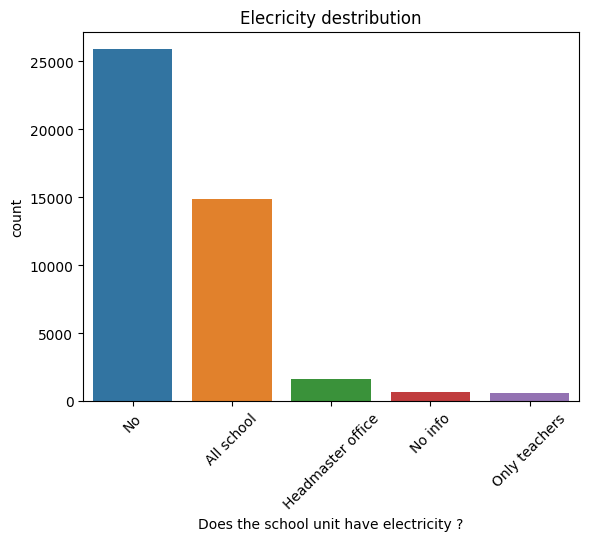

In [47]:
label_dict = {0: 'No info', 1: 'All school', 2: 'Headmaster office', 3: 'Only teachers', 4: 'No', 5: 'No info'}

electricity_category = subset['Does the school unit have electricity ?'].map(label_dict)


sns.countplot(x = electricity_category, order = electricity_category.value_counts().index)
plt.title('Elecricity destribution')
plt.xticks(rotation=45)
plt.show()


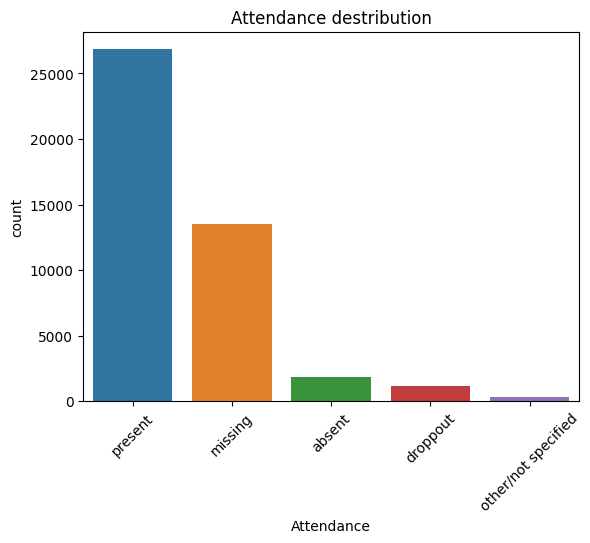

In [48]:
label_dict = {0: 'missing', 1: 'droppout', 2: 'present', 3: 'absent', 4: 'other/not specified'}

attendance_category = subset['Attendance'].map(label_dict)


sns.countplot(x = attendance_category, order = attendance_category.value_counts().index)
plt.title('Attendance destribution')
plt.xticks(rotation=45)
plt.show()